### Codio Activity 13.4: Decision Boundaries with Two Variables

**Expected Time = 60 minutes** 

**Total Points = 40** 

In the first examples, your work has utilized a straight vertical line as the decision boundary for logistic regression. This is what a decision boundary looks like with only one feature, however with two features the decision boundary becomes a linear function of the two inputs. In this activity, you will focus on generating functions for these boundaries and show strategies for visualizing these boundaries. 

#### Index

  - [Problem 1](#-Problem-1)
  - [Problem 2](#-Problem-2)
  - [Problem 3](#-Problem-3)
  - [Problem 4](#-Problem-4)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

### The Data

Again, you will use the penguins data from Seaborn.  This time, you will use two features -- `flipper_length_mm` and `bill_length_mm` to build a logistic model and visualize the decision boundary.  The data is loaded and visualized below.  

In [2]:
penguins = sns.load_dataset('penguins').dropna()
penguins = penguins.loc[(penguins['species'] == 'Adelie') | (penguins['species'] == 'Gentoo')]
X = penguins.drop('species', axis = 1)[['flipper_length_mm', 'bill_length_mm']]
y = np.where(penguins.species == 'Adelie', 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [3]:
X.head()

,flipper_length_mm,bill_length_mm
0,181.0,39.1
1,186.0,39.5
2,195.0,40.3
4,193.0,36.7
5,190.0,39.3


<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

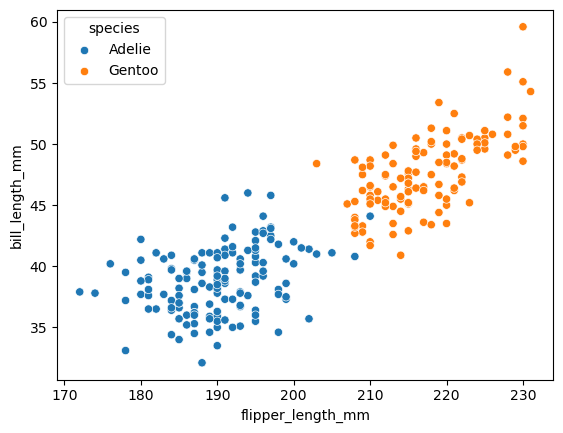

In [5]:
sns.scatterplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm', hue = 'species')

### Problem 1

#### A Logistic Model

Instantiate a `LogisticRegression` estimator as `log_reg` below and fit on the training data `X_train` and `y_train`.

In [7]:
log_reg = LogisticRegression().fit(X_train, y_train)
log_reg

LogisticRegression()

### Problem 2

#### Examining the coefficients

With two variables, the Sigma function is given by:

$$\sigma(x) = \frac{1}{1 + e^{-z}},$$

where

$$z = \beta_0 + \beta_1 * x_0 + \beta_2 * x_1.$$

Below, assign the intercept to  `beta_0` and the  coefficients to `beta_1` and `beta_2`, respectively.

Note that $x_0$ is the flipper length.  

In [17]:
beta_0 = float(log_reg.intercept_[0])
beta_0

-156.07280673563594

In [19]:
beta_1,beta_2 =log_reg.coef_[0]
print(beta_1)
beta_2


0.6128651364198826


np.float64(0.6901823668286597)

In [20]:
print(f'z = {beta_0: .2f} + {beta_1: .2f}x0 + {beta_2: .2f}x1')

z = -156.07 +  0.61x0 +  0.69x1


### Problem 3

#### Visualizing the decision boundary

<center>
    <img src = 'codio_13_4_solution/images/dboundary.png' />
</center>


There is both a brute force and more formal approach for visualizing the decision boundary. 

With two variables we can directly solve for the linear function in terms of `x_0` and  `beta`'s. Upon doing so we find a linear function defined as: 

$$y = -\frac{\beta_1}{\beta_2} * x_0 - \frac{\beta_0}{\beta_2}$$

Complete the function `decision_boundary` below that takes in `x_0` and  `beta`'s. This function should return the appropriate value for the predicitons based on the formula above.  Uncomment the plot to verify your results using the defined `x = np.linspace`.

In [21]:
def decision_boundary(x0, beta_0, beta_1, beta_2):
    '''
    Function returns values for linear decision boundaries
    in binary classification setting according to the formula
    y = -beta_1/beta_2 * x0 - beta_0/beta_2
    
    Arguments
    ---------
    x0: np.array
        domain for evaluation of function
        
    beta_0: float
         intercept from fit logistic model
    beta_1: float
        first coefficient from logistic model
    beta_2: float
        second coefficient from logistic model
    
    Returns
    -------
    np.array
        values of y
    '''
    return None

In [22]:
def decision_boundary(x0, beta_0, beta_1, beta_2):
    y = -beta_1/beta_2 * x0 - beta_0/beta_2
    return y

In [23]:
x = np.linspace(165, 240, 100)

In [24]:
print(decision_boundary(x, beta_0, beta_1, beta_2)[0], decision_boundary(x, beta_0, beta_1, beta_2)[-1])

79.61672431425194 13.018550497240824


In [25]:
#x = np.linspace(165, 240, 100)
#sns.scatterplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm', hue = 'species')
#plt.plot(x, decision_boundary(x, beta_0, beta_1, beta_2), '--', color = 'black')
#plt.ylim(25, 65)
#plt.fill_between(x, decision_boundary(x, beta_0, beta_1, beta_2), alpha = 0.3, color = 'lightblue')
#plt.fill_between(x, decision_boundary(x, beta_0, beta_1, beta_2), np.repeat(70, 100), alpha = 0.3)

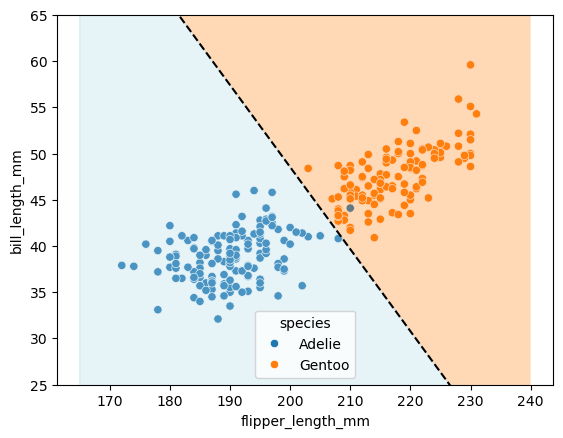

In [30]:
x = np.linspace(165,240,100)
sns.scatterplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm', hue = 'species')
plt.plot(x, decision_boundary(x, beta_0, beta_1, beta_2), '--', color = 'black')
plt.ylim(25,65)
plt.fill_between(x, decision_boundary(x, beta_0, beta_1, beta_2), alpha = 0.3, color = 'lightblue')
plt.fill_between(x, decision_boundary(x, beta_0, beta_1, beta_2), np.repeat(70, 100), alpha = 0.3)

### Problem 4

#### Comparing regressors

Now, fit a second regressor using the argument `C = 0.001`. Compare the decision boundary by using what you've seen earlier. How did the decision boundary change based on this?  The slope of the new decision boundary should either be greater than or less than the default settings. Assign your answer as a string -- `greater than` or `less than` -- to `ans4` below. Hint: Remember that the slope is negative.



In [31]:
ans4 = 'less than'

### Codio Activity 13.5: Experimenting with $\beta_0$ and $\beta_1$ in Logistic Function

This activity focuses on changing the $\beta_0$ and $\beta_1$ parameters within the logistic function.  Your goal should be to understand how each parameter effects the resulting sigmoid curve.  In the next activity, you will use a numeric approach to identify the best parameters to fit a given classification problem, here your goal is to see how these parameters change the geometry of the curve.

### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

### The Data

For this activity we revisit the credit data and examine only the balance feature to classifiy 

In [34]:
credit = pd.read_csv('codio_13_5_solution/data/default.csv')

In [35]:
credit.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [36]:
y = np.where(credit['default'] == 'Yes', 1, 0)

([<matplotlib.axis.YTick at 0x16a89d450>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

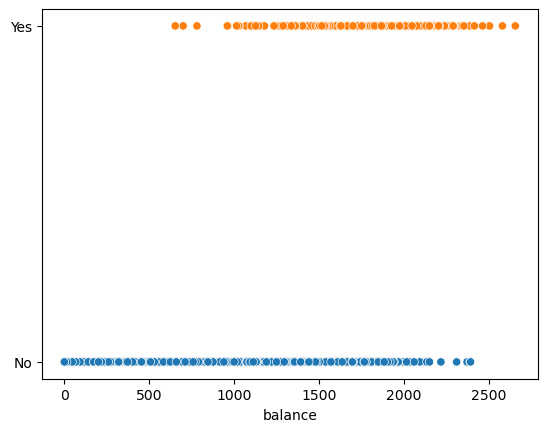

In [43]:
sns.scatterplot(data = credit, x = 'balance', y = y, hue = 'default', legend = False)
plt.yticks([0,1],['No','Yes'])

### Problem 1

### Function for Plotting 

Complete the definition of the function `sigma` below that takes, as parameters, the array `x` and the coefficients `beta_0`, and `beta_1`. Your function should return the evaluation of the Sigma function given by:


$$\Sigma(x, \beta_0, \beta_1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x})}$$



In [44]:
def sigma(x, beta_0, beta_1):
    """Implements sigma function with linear parameters
    beta_0 and beta_1.
    
    Parameters
    ----------
    x: type `np.ndarray`
       1D NumPy array of domain inputs
    beta_0: type `float`
        float representing y-intercept of linear exponent
    beta_1: type `float`
        float representing slope of linear exponent
        
    Returns array of values size len(x)
    """
    return None

In [45]:
def sigma(x,beta_0, beta_1):
    sig = 1/(1 + np.exp(-beta_0 - beta_1*x))
    return sig

In [46]:
sigma(np.array([-1, 0, 1]), 1, 1)

array([0.5       , 0.73105858, 0.88079708])

In [80]:
item = pd.Series([-1,0,1])
item

0   -1
1    0
2    1
dtype: int64

In [81]:
sigma(item, 1,1)

0    0.500000
1    0.731059
2    0.880797
dtype: float64

### Problem 2

### Varying $\beta_0$

Below, the image shows three curves plotted, all with $\beta_1 = 0.01$, and with $\beta_0 = 5, 10, 15$.  Enter your answer as an integer with the appropriate $\beta_0$ value to the respective variables `a`, `b`, and `c` below.

1. $\beta_0 = 15$
2. $\beta_0 = 10$
3. $\beta_0 = 5$

<center>
    <img src = 'codio_13_5_solution/images/betasopt.png' />
</center>

In [47]:
a = 5
b = 10
c = 15

### Problem 3

### Varying $\beta_1$

Now, compare the given values for $\beta_1$ with $\beta_0 = 10$ and match the correct curve with the given value as a float below.

1. $\beta_1 = -0.025$
2. $\beta_1 = -0.01$
3. $\beta_1 = -0.005$


<center>
    <img src = 'codio_13_5_solution/images/p3.png' />
</center>

In [49]:
a = -0.01
b = -0.025
c = -0.005

### Problem 4

### Comparing to `LogisticRegression` estimator

In the code cell below instantiate a `LogisticRegression` estimator and fit it to the `balance` column of the `credit` dataframe and `y`. Assign this model to the `clf` variable.

Next, identify the values of the intercept and the coefficient for this  model to `beta_0` and `beta_1`, respectively below. 

In [50]:
clf = LogisticRegression().fit(credit[['balance']],y)
clf

LogisticRegression()

In [51]:
beta_0 = clf.intercept_
beta_0

array([-10.65132824])

In [52]:
beta_1 = clf.coef_
beta_1

array([[0.00549892]])

In [76]:
credit.balance

0        729.526495
1        817.180407
2       1073.549164
3        529.250605
4        785.655883
           ...     
9995     711.555020
9996     757.962918
9997     845.411989
9998    1569.009053
9999     200.922183
Name: balance, Length: 10000, dtype: float64

In [84]:
display(credit.balance.shape)


(10000,)

In [87]:
beta_0

array([-10.65132824])

In [89]:
beta_1

array([[0.00549892]])

In [88]:
sigma(credit.balance, beta_0, beta_1[0])

0       0.001306
1       0.002113
2       0.008595
3       0.000434
4       0.001777
          ...   
9995    0.001183
9996    0.001526
9997    0.002467
9998    0.116760
9999    0.000071
Name: balance, Length: 10000, dtype: float64

In [67]:
display(x[:5])
sigma(x, beta_0, beta_1)[0][:5]

array([165.        , 165.75757576, 166.51515152, 167.27272727,
       168.03030303])

array([5.86416235e-05, 5.88864106e-05, 5.91322194e-05, 5.93790542e-05,
       5.96269193e-05])

In [92]:
x_balance = pd.DataFrame({"balance": credit.balance, "sigma": sigma(credit.balance, beta_0, beta_1[0])})

In [97]:
x_balance = x_balance.sort_values("balance")
x_balance

,balance,sigma
1077,0.000000,0.000024
430,0.000000,0.000024
9192,0.000000,0.000024
816,0.000000,0.000024
2648,0.000000,0.000024
...,...,...
7437,2461.506979,0.947064
1136,2499.016750,0.956501
1160,2502.684931,0.957333
7815,2578.469022,0.971459


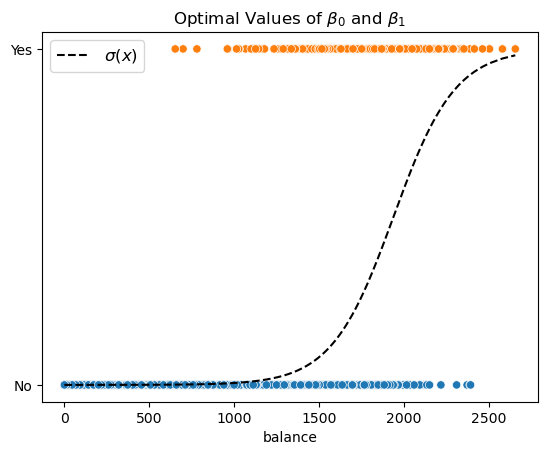

In [98]:
sns.scatterplot(data = credit, x = 'balance', y = y, hue = 'default', legend = False)
plt.yticks([0, 1], ['No', 'Yes'])
plt.plot(x_balance["balance"], x_balance["sigma"], '--', color = 'black', label = r'$\sigma(x)$')
#plt.plot(x, np.random.random(len(x)), '--', color = 'black', label = r'$\sigma(x)$')
plt.legend(fontsize = 12)
plt.title(r'Optimal Values of $\beta_0$ and $\beta_1$');

Now that you have a feel for how these parameters control the shape of the sigmoid curve, we will introduce a loss function that we try to minimize in order to solve for the optimal values of $\beta_0$ and $\beta_1$.